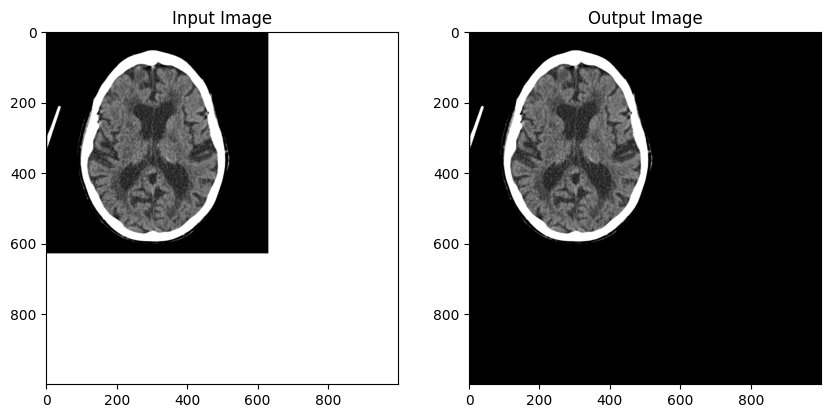

In [16]:
import itk
import matplotlib.pyplot as plt
import numpy as np

# Read input image
input_image = itk.imread("Brain_CT.jpg", itk.F)

# Create the resample filter
resample_filter = itk.ResampleImageFilter.New(Input=input_image)

# Set the transform to identity by default
identity_transform = itk.IdentityTransform[itk.D, 2].New()
resample_filter.SetTransform(identity_transform)

# Set the interpolator to nearest neighbor
interpolator = itk.NearestNeighborInterpolateImageFunction.New(input_image)
resample_filter.SetInterpolator(interpolator)

# Set output parameters using GetSpacing, GetOrigin, and GetDirection
resample_filter.SetOutputSpacing(input_image.GetSpacing())
resample_filter.SetOutputOrigin(input_image.GetOrigin())
resample_filter.SetOutputDirection(input_image.GetDirection())

# Set the desired size
output_size = [1000, 1000]
resample_filter.SetSize(output_size)

# Set default pixel value
resample_filter.SetDefaultPixelValue(255)

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "ResampleImageFilterOutput1_800.png")

# Set default pixel value to 0
resample_filter.SetDefaultPixelValue(0)

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "ResampleImageFilterOutput1_2.png")

#Show ResampleImageFilterOutput1_1.png and ResampleImageFilterOutput1_2.png
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(plt.imread("ResampleImageFilterOutput1_1.png"), cmap='gray')
plt.title("Input Image")
plt.axis('on')
plt.subplot(1,2,2)
plt.imshow(plt.imread("ResampleImageFilterOutput1_2.png"), cmap='gray')
plt.title("Output Image")
plt.axis('on')
plt.show()




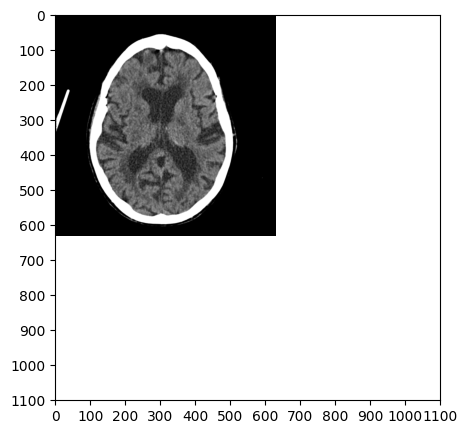

In [20]:
# Display "Brain_CT.jpg" image
plt.figure(figsize=(5,5))
plt.imshow(plt.imread("Brain_CT.jpg"), cmap='gray')
plt.title("")
plt.xticks(np.arange(0, 1200, 100))
plt.yticks(np.arange(0, 1200, 100))
plt.axis('on')
plt.show()
